# Tutorial: Takahashi Alexander

## Introduction

This document explains how to use the Takahashi Alexander endpoints of the **Private Equity Model API** provided by [prettymodels.ai](https://prettymodels.ai). 
The original model has been published by [Takahashi and Alexander (2002)](https://doi.org/10.3905/jpm.2002.319836) in the *Journal of Portfolio Management* article titled 'Illiquid Alternative Asset Fund Modeling'.


## Setup Python and API keys

In [1]:
# Load packages
import os
import requests
import pandas as pd

In [2]:
# Define the API root URL

# EVERY USER NEEDS TO DO THIS !!!

base_product_url = "https://base-product-url.app"
primary_api_key = "needed-for-authentication"
secondary_api_key = "needed-for-authentication"

if (base_product_url == "https://base-product-url.app"):
    print("IMPORTANT: You need to MANUALLY set the correct base_product_url and primary_api_key!")
    from api_root import primary_api_key, secondary_api_key, base_product_url

IMPORTANT: You need to MANUALLY set the correct base_product_url and primary_api_key!


## Available endpoints in the Takahashi Alexander module

In [3]:
# TAKAHASHI ALEXANDER (2002) MODEL
model = "ta_02"

endpoints = [
    "cash_flow_expectations",
    "commitment_planner",
]

## Define the API request body

The Takahashi Alexander (2002) model has the following parameters:

-   **rate\_of\_contribution**: how fast should the fund draw the open commitment at the fund start
-   **investment\_period\_end**: how long can the fund call the open fund commitmennt
-   **fund\_lifetime**: when will the fund be completetely liquidtated
-   **growth\_rate**: what is the annual fund return (i.e., internal rate of return)
-   **annual\_yield**: what is the minimum distribution percentage per period
-   **bow\_factor**: how are the distributions distributed over the fund life time (higher bow\_factor -&gt; later distributions, lower bow\_factor -&gt; earlier distributions)

**Please enter your own parameter assumptions!**


In [4]:

# Define the data to be sent in the request bodies (as a dictionaries)

request_body_cash_flow_expectations = {
    "rate_of_contribution": 0.3,
    "investment_period_end": 5,
    "fund_lifetime": 13,
    "growth_rate": 0.1,
    "annual_yield": 0,
    "bow_factor": 2.5,
    "cumulative_output": True,
    "commitment": 100,
}

request_body_commitment_planner = {
    "rate_of_contribution": 0.3,
    "investment_period_end": 5,
    "fund_lifetime": 13,
    "growth_rate": 0.1,
    "annual_yield": 0,
    "bow_factor": 2.5,
    "cumulative_output": True,
    "future_commitment_list": [ # enter here your future fund investments!
        {"time": 0, "commitment": 100},
        {"time": 1, "commitment": 50},
        {"time": 2, "commitment": 200},
        {"time": 3, "commitment": 44.23},
    ],
}

## Run the API requests

POST request successful: cash_flow_expectations
POST request successful: commitment_planner


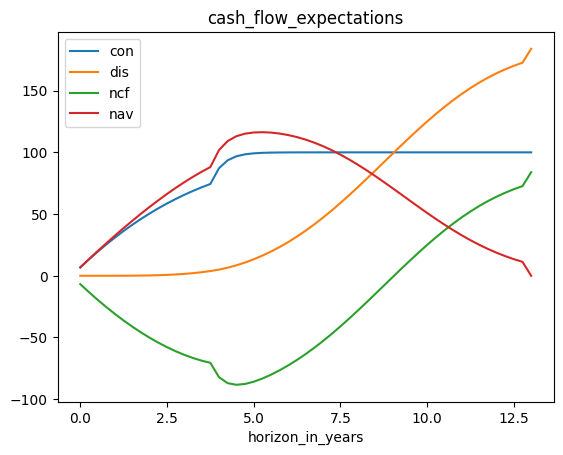

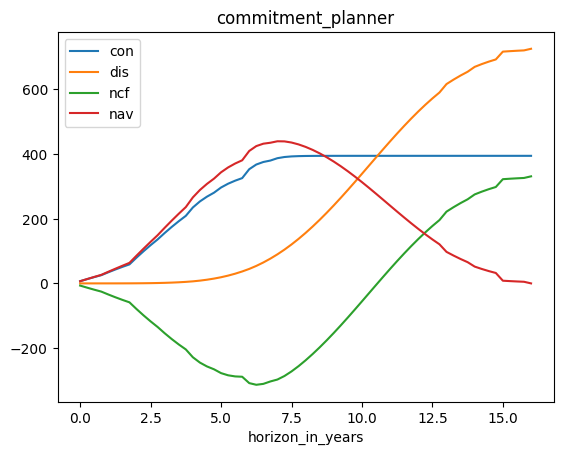

In [5]:

for endpoint in endpoints:
    # Build API URL
    url = os.path.join(base_product_url, model, endpoint)

    # Select correct request_body
    if endpoint == "cash_flow_expectations":
        request_body = request_body_cash_flow_expectations
    elif endpoint == "commitment_planner":
        request_body = request_body_commitment_planner
    else:
        raise ValueError(f"endpoint {endpoint} not defined.")

    # Set header for authentication
    headers = {"X-BLOBR-KEY": primary_api_key}

    # Send the POST request
    response = requests.post(url, json=request_body, headers=headers)

    if response.status_code == 401:
        # needed for API Key Rotation
        # More info: https://www.blobr.io/post/api-keys-best-practices
        headers = {"X-BLOBR-KEY": secondary_api_key}
        response = requests.post(url, json=request_body, headers=headers)

    # Check the response status code
    if response.status_code == 200:
        # Request was successful
        print(f"POST request successful: {endpoint}")
        # print("Response JSON:", response.json())
    else:
        # Request failed
        print("POST request failed with status code:", response.status_code)

    # Convert dict to pd.DataFrame
    df = pd.DataFrame(response.json())
    df.index.name = "horizon_in_years"
    # print("df", df.columns, df)

    # Save pd.DataFrame to .csv file
    df.to_csv(f"takahashi_alexander---{endpoint}.csv")
    plot = df.plot(title=endpoint)
